In [1]:
import numpy as np
import matplotlib.pyplot as plt

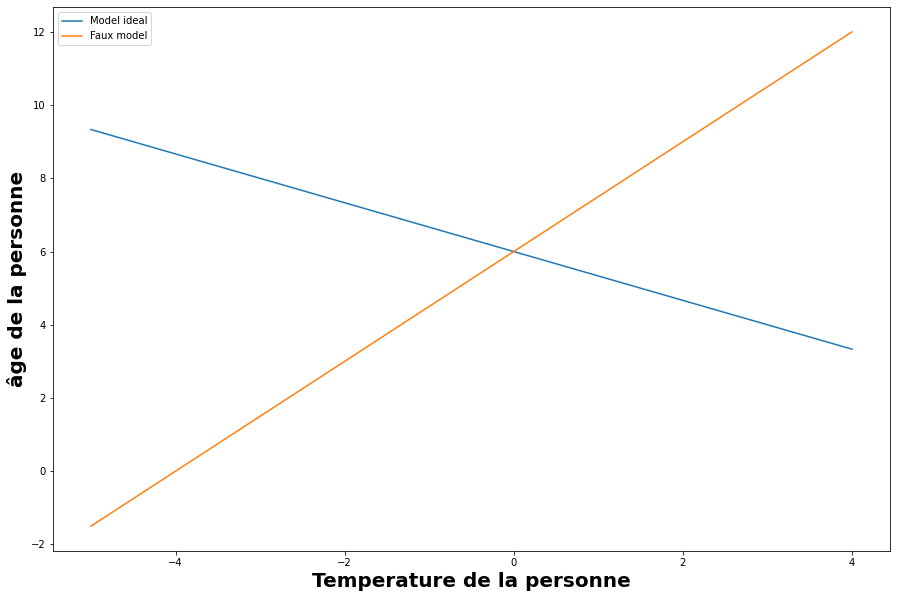

In [2]:
plt.figure(figsize=(15,10))
x= np.array(range(-5,5))
y=-2/3*x+6

x_prime = np.array(range(-5,5))
y_prime = 3/2*x_prime + 6

plt.plot(x,y,label='Model ideal') 
plt.plot(x_prime,y_prime, label='Faux model')
plt.xlabel("Temperature de la personne", fontdict={'size': 20,'weight': 'bold'})
plt.ylabel("âge de la personne",fontdict={'size': 20,'weight': 'bold'})
plt.legend()
plt.show()

In [3]:
def equation(x,y):
    return -2/3*x-y+6
    

In [4]:
class1 = []
class2 = []
for i in range(100):
    while len(class1) == i:
        x = np.random.uniform(0,5)
        y = np.random.uniform(0,5)
        if equation(x,y)>=0:
            class1.append([x,y])
for i in range(100):
    while len(class2) == i:
        x = np.random.uniform(0,8)
        y = np.random.uniform(0,8)
        if equation(x,y)<0:
            class2.append([x,y])

In [5]:
len(class1),len(class2)

(100, 100)

In [6]:
import numpy as np

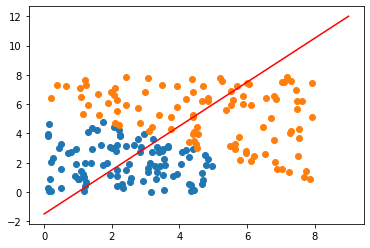

In [7]:
class1_X = np.array(class1)[:,0]
class1_Y = np.array(class1)[:,1]
class2_X = np.array(class2)[:,0]
class2_Y = np.array(class2)[:,1]


plt.scatter(class1_X,class1_Y)
plt.scatter(class2_X,class2_Y)

x_prime  = np.array(range(10))
plt.plot(x_prime,y_prime,'r') 
plt.show()


### The equation is y=x. Let's minimize the error

In [8]:
def step_func(x):
    return 0 if x <0 else 1

In [9]:
def new_weights(point,weights,classe):
    learning_rate = .01
    p = point.copy() 
    score=np.dot(p+[1],weights)
    pred = step_func(score)
    w = weights[:2]
    b=weights[-1]
    new_w = w+learning_rate*(classe-pred)*np.array(p)
    new_b = b+learning_rate*(classe-pred)
    
    return np.append(new_w,[new_b], axis=0)
    

In [10]:
new_weights([1,2],[1,2,3],0)

array([0.99, 1.98, 2.99])

In [16]:
equation_weights = [-1,1,0] #x , y ,bias=> -1x +1y +0 = 0 => y= x
for i in range(1000):
    for point in class2:
        equation_weights = new_weights(point,equation_weights,1)
    for point in class1:
        equation_weights = new_weights(point,equation_weights,0)

In [17]:
equation_weights

array([ 0.09246319,  0.12894169, -0.79      ])

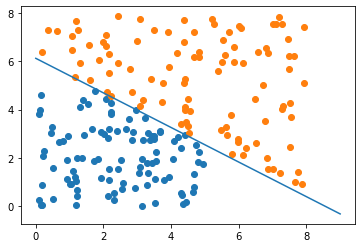

In [18]:
x= np.array(range(10))
y=-equation_weights[0]/equation_weights[1]*x-equation_weights[2]/equation_weights[1]
plt.plot(x,y);
plt.scatter(class1_X,class1_Y) # Blue points
plt.scatter(class2_X,class2_Y)
plt.show()

In [23]:
def predict(x):
    return "positif" if step_func(np.dot(x+[1],equation_weights)) == 1 else "negatif"

In [24]:
predict([8,0.9])

'positif'

In [25]:
predict([1,4])

'negatif'